In [13]:
# Python imports 
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from spectral.io import envi
from pyproj import Proj
import os
from glob import glob

In [11]:
# Examine Adjacent Quick Look geoTIFF Scenes using GDAL
for geotiff in glob("AVIRIS-NG/*.tif"):
    print(f"{os.path.basename(geotiff)}")

ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_017_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t103917_017_L2A_OE_main_27577724_RFL_ORT_QL.tif


In [15]:
# open and read tif files for comparison
ql_018 = gdal.Open('AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT_QL.tif')
ql_005 = gdal.Open('AVIRIS-NG/ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT_QL.tif')
ql_004 = gdal.Open('AVIRIS-NG/ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT_QL.tif')

nbands_018 = ql_018.RasterCount
ncols_018 = ql_018.RasterXSize
nrows_018 = ql_018.RasterYSize

nbands_005 = ql_005.RasterCount
ncols_005 = ql_005.RasterXSize
nrows_005 = ql_005.RasterYSize

nbands_004 = ql_004.RasterCount
ncols_004 = ql_004.RasterXSize
nrows_004 = ql_004.RasterYSize

print(f"Bands_018:\t{nbands_018}")
print(f"Rows_018:\t{nrows_018}")
print(f"Cols_018:\t{ncols_018}")
print("\n")
print(f"Bands_005:\t{nbands_005}")
print(f"Rows_005:\t{nrows_005}")
print(f"Cols_005:\t{ncols_005}")
print("\n")
print(f"Bands_003:\t{nbands_004}")
print(f"Rows_003:\t{nrows_004}")
print(f"Cols_003:\t{ncols_004}")

Bands_018:	3
Rows_018:	560
Cols_018:	676


Bands_005:	3
Rows_005:	791
Cols_005:	654


Bands_003:	3
Rows_003:	748
Cols_003:	666


In [17]:
ql_018.GetProjection()

'PROJCS["WGS 84 / UTM zone 34S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32734"]]'

In [19]:
# Create a Virtual Raster of the 2 Adjacent AVIRIS-NG Scenes
# build vrt - using AVIRIS-NG quicklook images 

# running gdalbuilvrt as a gdal command line using the '!' in front says do this as a command, not as python
# using scences from the Table Mountain West side

!gdalbuildvrt tm_mosaic.vrt AVIRIS-NG/*.tif

# read in vrt, ql ~ quicklook
tm_vrt = gdal.Open('tm_mosaic.vrt')

nbands_vrt = tm_vrt.RasterCount
ncols_vrt = tm_vrt.RasterXSize
nrows_vrt = tm_vrt.RasterYSize

print(f"Bands_vrt:\t{nbands_vrt}")
print(f"Rows_vrt:\t{nrows_vrt}")
print(f"Cols_vrt:\t{ncols_vrt}")

Bands_vrt:	3
Rows_vrt:	2012
Cols_vrt:	1788


'gdalbuildvrt' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
# Examine AVIRIS-NG Quiklook Reflectance Data as a Numerical Array

# Recall that we created the quicklook virtual raster (ql_vrt) from two adjacent scenes
tm_array = tm_vrt.ReadAsArray()

# look at the shape. GDAL reads the array as band,x,y.  
print(tm_array.shape)     

(3, 2012, 1788)


In [23]:
# To plot the array with matplotlib, the data need to be arranged as y, x, band.
# We'll transpose the data
trans_array = tm_array.transpose((1,2,0))
print(trans_array.shape)

(2012, 1788, 3)


In [8]:
# To demonstrate that data needs transposed, this will give an error because the data needs to be transposed
# This is the error:  TypeError: Invalid shape (3, 1268, 1216) for image data
# plt.imshow(tm_array)

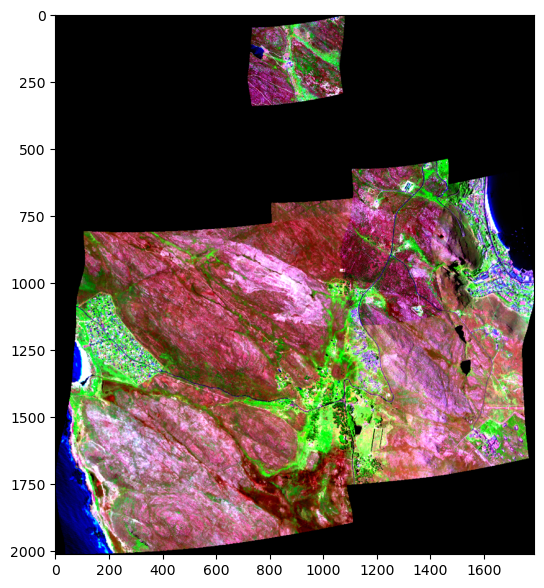

In [25]:
# The imshow() function in the pyplot module of matplotlib library is used to display data as an image.
plt.rcParams['figure.figsize'] = [10,7]
plt.imshow(trans_array)

In [29]:
# Need to untar/uncompress data files
#!tar -zxvf ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT.tar.gz
#!tar -zxvf ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT.tar.gz
#!tar -zxvf ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT.tar.gz

In [33]:
for files in glob("AVIRIS-NG/*"):
    print(f"{os.path.basename(files)}")

ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_017_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT
ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT.hdr
ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_018_L2A_OE_main_27577724_UNC_ORT.tar.gz
ang20231126t103917_017_L2A_OE_main_27577724_RFL_ORT.tar.gz
ang20231126t103917_017_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t103917_017_L2A_OE_main_27577724_UNC_ORT.tar.gz


In [31]:
hdr_f = 'AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT.hdr'
with open(hdr_f, mode='r') as hdr:
    lines = (hdr.read())
    print(lines)

ENVI
description = {
  L2A Analytyical per-pixel surface retrieval}
samples = 676
lines = 560
bands = 425
header offset = 0
file type = ENVI Standard
data type = 4
interleave = bil
byte order = 0
map info = {UTM, 1, 1, 260966.62597821804, 6214924.414268894, 1.9, 1.9, 34, South, WGS-84, units=Meters, rotation=0.0}
wavelength units = Nanometers
wavelength = { 377.1956495 , 382.20564950000005 , 387.2156495 , 392.2256495 , 397.2256495 , 402.2356495 , 407.24564949999996 , 412.2556495 , 417.2656495 , 422.27564950000004 , 427.2856495 , 432.29564949999997 , 437.29564949999997 , 442.3056495 , 447.3156495 , 452.3256495 , 457.3356495 , 462.34564950000004 , 467.3556495 , 472.35564949999997 , 477.36564949999996 , 482.3756495 , 487.3856495 , 492.3956495 , 497.4056495 , 502.4156495 , 507.4256495 , 512.4256495000001 , 517.4356495 , 522.4456495000001 , 527.4556495 , 532.4656494999999 , 537.4756495 , 542.4856495 , 547.4856495 , 552.4956495 , 557.5056495 , 562.5156495 , 567.5256495 , 572.5356495 , 577.54

In [35]:
# Open the ENVI file and read the file bands, row, cols

rfl_018_open = gdal.Open('AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT')

nbands = rfl_018_open.RasterCount
nrows = rfl_018_open.RasterYSize
ncols = rfl_018_open.RasterXSize

print(f"Bands:\t{nbands}")
print(f"Rows:\t{nrows}")
print(f"Cols:\t{ncols}")

Bands:	425
Rows:	560
Cols:	676


In [39]:
# GDAL to get Metadata and Projection Information

rfl_018_open.GetMetadata()

{'Band_1': 'channel_0 (377.1956495 Nanometers)',
 'Band_10': 'channel_9 (422.27564950000004 Nanometers)',
 'Band_100': 'channel_99 (873.0556495000001 Nanometers)',
 'Band_101': 'channel_100 (878.0656495 Nanometers)',
 'Band_102': 'channel_101 (883.0756494999999 Nanometers)',
 'Band_103': 'channel_102 (888.0756494999999 Nanometers)',
 'Band_104': 'channel_103 (893.0856495 Nanometers)',
 'Band_105': 'channel_104 (898.0956495 Nanometers)',
 'Band_106': 'channel_105 (903.1056495 Nanometers)',
 'Band_107': 'channel_106 (908.1156495 Nanometers)',
 'Band_108': 'channel_107 (913.1256495 Nanometers)',
 'Band_109': 'channel_108 (918.1356495 Nanometers)',
 'Band_11': 'channel_10 (427.2856495 Nanometers)',
 'Band_110': 'channel_109 (923.1456495 Nanometers)',
 'Band_111': 'channel_110 (928.1456495 Nanometers)',
 'Band_112': 'channel_111 (933.1556495 Nanometers)',
 'Band_113': 'channel_112 (938.1656495000001 Nanometers)',
 'Band_114': 'channel_113 (943.1756495 Nanometers)',
 'Band_115': 'channel_114

In [41]:
print("ENVI image WKT: \n"+str(rfl_018_open.GetProjection()))

ENVI image WKT: 
PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
# UTM zone 34S, datum WGS-84 = EPSG Code: 32734

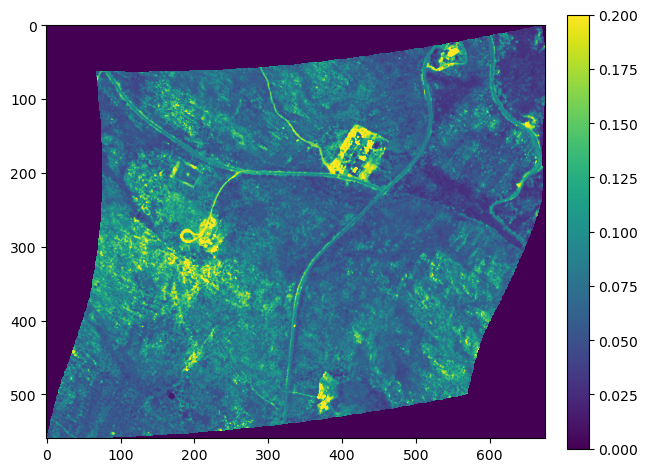

In [59]:
# Read one spectral band array and plot it
#### uncomment one of the GetRaseterBand lines to run
img_red = rfl_018_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
#img_green = rfl_018_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = rfl_018_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(img_red, vmin=0, vmax=.20)
#plt.imshow(img_green, vmin=0, vmax=0.20)
#plt.imshow(img_blue, vmin=0, vmax=0.20)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

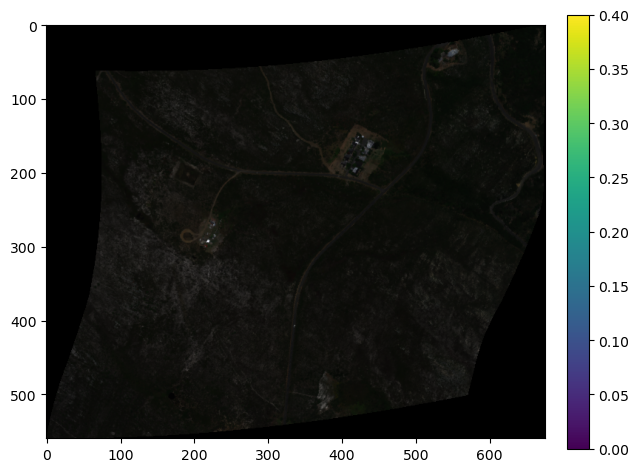

In [61]:
# Create a Red, Green, Blue Composite and Visualize
# get r,g,b arrays
red, green, blue = rfl_018_open.GetRasterBand(57).ReadAsArray(), rfl_018_open.GetRasterBand(38).ReadAsArray(), rfl_018_open.GetRasterBand(22).ReadAsArray()

# set fill values (-9999.) to 0 for each array
red[red == -9999.], green[green == -9999.], blue[blue == -9999.] = 0, 0, 0

# function scales reflectance values to 8 bits
scale8bit = lambda a: ((a - a.min()) * (1/(a.max() - a.min()) * 255)).astype('uint8')

# get 8bit arrays for each band
red8, green8, blue8 = scale8bit(red), scale8bit(green), scale8bit(blue)

# set rescaled fill pixels back to 0 for each array
red8[red == 0], green8[green == 0], blue8[blue == 0] = 0, 0, 0

rgb_stack = np.zeros((nrows,ncols,3),'uint8')
rgb_stack[...,0], rgb_stack[...,1], rgb_stack[...,2] = red8, green8, blue8

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [63]:
# Apply a Histogram Stretch to for an Improved Visualization

rgb_stack.shape

(560, 676, 3)

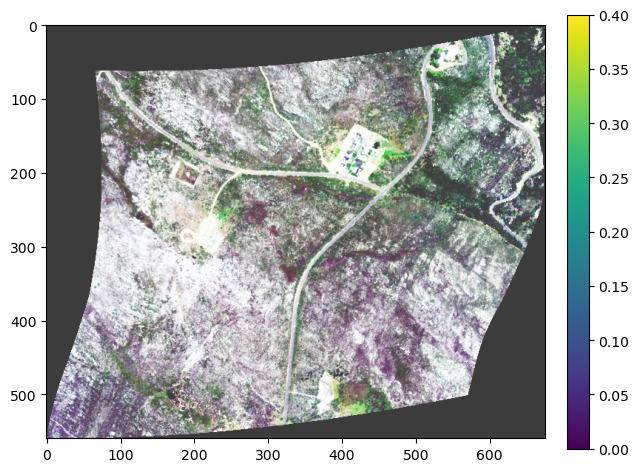

In [65]:
# apply histogram equalization to each band
for i in range(rgb_stack.shape[2]):

    # band i
    b = rgb_stack[:,:,i]
    
    # histogram from flattened (1d) image
    b_histogram, bins = np.histogram(b.flatten(), 256)

    # cumulative distribution function
    b_cumdistfunc = b_histogram.cumsum()

    # normalize
    b_cumdistfunc = 255 * b_cumdistfunc / b_cumdistfunc[-1]

    # get new values by linear interpolation of cdf
    b_equalized = np.interp(b.flatten(), bins[:-1], b_cumdistfunc)
    
    # reshape to 2d and add back to rgb_stack
    rgb_stack[:,:,i] = b_equalized.reshape(b.shape)

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [67]:
# Plot a Spectral Profile From a Point of Interest
import matplotlib.pyplot as plt
from spectral.io import envi
import numpy as np
from pyproj import Proj
import os
from osgeo import gdal

In [69]:
# let's define the coordinates and data file from which we'll extract spectra and the lat/lon coordinates
data_file = 'AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT'
coords = [-33.9485221, 18.39214325]
coords

[-33.9485221, 18.39214325]

In [71]:
data_file

'AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT'

In [ ]:
# Before we can extract pixel spectral information, we need to convert the lat/lon coordinate to an image coordinate (pixel, line) space

In [ ]:
# 1. Project point location lat/lon to UTM (zone 34S). The AVIRIS-NG Scene is in UTM zone 34S (EPSG:32734) as stated before

In [77]:
# step to translate coordinates
# EPSG:32734 - WGS-84 / UTM zone 34S

from pyproj import Proj
p = Proj("EPSG:32734", preserve_units=False)
x,y = p(18.39214325, -33.9485221)
print('x value in UTM meters:', x)
print('y value in UTM meters:', y)

x value in UTM meters: 258993.3449821365
y value in UTM meters: 6240487.526984125


In [81]:
coords_UTM = [6240487.526984125, 258993.3449821365]

# define aonther location for comparison
coords_UTM2 = [6239776.9, 27902.3]

In [83]:
gdal_ds = gdal.Open(data_file)
proj_native = gdal_ds.GetProjection()
proj_native

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [87]:
#2. Get and print AVIRIS-NG Scene information that we need in order to transform the UTM point x,y values to an image row/col location

trans = gdal_ds.GetGeoTransform() # x_ul, x_px, x_rot, y_ul, y_rot, y_px
print('\nGetGeoTransform Return Values =', trans) 


GetGeoTransform Return Values = (260966.62597821804, 1.9, 0.0, 6214924.414268894, 0.0, -1.9)


In [89]:
# 3. x,y offset values are a position on the x,y grid of the pixel of interest

x_px_offset = int(round((coords_UTM[1] - trans[0]) / trans[1]))
y_px_offset = int(round((coords_UTM[0] - trans[3]) / trans[5]))

print(x_px_offset, y_px_offset)

-1039 -13454


In [91]:
x_px_offset2 = int(round((coords_UTM2[1] - trans[0]) / trans[1]))
y_px_offset2 = int(round((coords_UTM2[0] - trans[3]) / trans[5]))

print(x_px_offset2, y_px_offset2)

-122665 -13080


In [93]:
ds = envi.open(os.path.splitext(data_file)[0] + '.hdr')
ds

	Data Source:   '.\AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT'
	# Rows:            560
	# Samples:         676
	# Bands:           425
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32

In [95]:
offset_size = 1
data = ds.open_memmap(interleave='bip')[y_px_offset - 1: y_px_offset + 1, x_px_offset - 1: x_px_offset + 1, :]
data

array([], shape=(0, 0, 425), dtype=float32)

In [101]:
offset_size = 1
data2 = ds.open_memmap(interleave='bip')[y_px_offset2 - 1: y_px_offset2 + 1, x_px_offset2 - 1: x_px_offset2 + 1, :]
data2

array([], shape=(0, 0, 425), dtype=float32)

C:\Users\PC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\PC\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


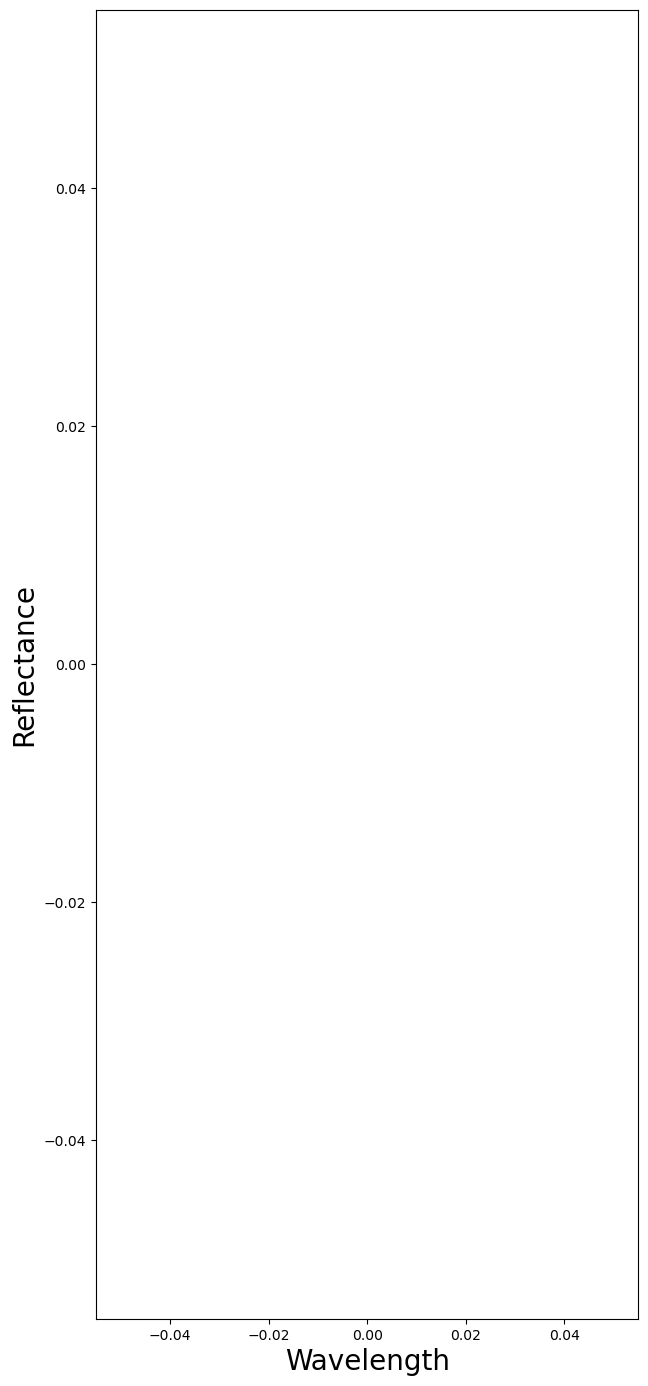

In [99]:
wl = np.array([float(x) for x in ds.metadata['wavelength']])
wl2 = np.array([float(x) for x in ds.metadata['wavelength']])

plt.plot(wl, np.mean(data, axis=(0, 1)))
plt.rcParams['figure.figsize'] = [8, 8]
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

# plot the average spectrum

In [103]:
for files in glob("AVIS data/*"):
    print(f"{os.path.basename(files)}")

bioscape_v02_34_11_ql.tif
bioscape_v02_34_11_rfl
bioscape_v02_34_11_rfl.hdr


In [105]:
hdr_f = 'AVIS data/bioscape_v02_34_11_rfl.hdr'
with open(hdr_f, mode='r') as hdr:
    lines = (hdr.read())
    print(lines)

ENVI
description = {
  /store/brodrick/bioscape/ang/mosaic_v02/34_11/bioscape_v01_34_11_rfl}
samples = 2000
lines = 2000
bands = 425
header offset = 0
file type = ENVI Standard
data type = 4
interleave = bil
byte order = 0
map info = { Albers Conical Equal Area , 1 , 1 , 789997.5 , 850002.5 , 5 , 5 }
projection info = { 9 , 6378137 , 6356752.314245179 , -30 , 25 , 1400000 , 1300000 , -22 , -38 , Albers Conical Equal Area }
coordinate system string = { PROJCS["Hartebeesthoek94_ZAF_BSU_Albers_25E" , GEOGCS["GCS_Hartebeesthoek_1994" , DATUM["D_Hartebeesthoek_1994" , SPHEROID["WGS_1984" , 6378137.0 , 298.257223563]] , PRIMEM["Greenwich" , 0.0] , UNIT["Degree" , 0.0174532925199433]] , PROJECTION["Albers"] , PARAMETER["False_Easting" , 1400000.0] , PARAMETER["False_Northing" , 1300000.0] , PARAMETER["Central_Meridian" , 25.0] , PARAMETER["Standard_Parallel_1" , -22.0] , PARAMETER["Standard_Parallel_2" , -38.0] , PARAMETER["Latitude_Of_Origin" , -30.0] , UNIT["Meter" , 1.0]] }
band names = { 

In [107]:
# Open the ENVI file and read the file bands, row, cols

rfl_bio_open = gdal.Open('AVIS data/bioscape_v02_34_11_rfl')

nbands = rfl_bio_open.RasterCount
nrows = rfl_bio_open.RasterYSize
ncols = rfl_bio_open.RasterXSize

print(f"Bands:\t{nbands}")
print(f"Rows:\t{nrows}")
print(f"Cols:\t{ncols}")

Bands:	425
Rows:	2000
Cols:	2000


In [109]:
# GDAL to get Metadata and Projection Information

rfl_bio_open.GetMetadata()

{'Band_1': 'Band 1 (377.1956495)',
 'Band_10': 'Band 10 (422.27564950000004)',
 'Band_100': 'Band 100 (873.0556495000001)',
 'Band_101': 'Band 101 (878.0656495)',
 'Band_102': 'Band 102 (883.0756494999999)',
 'Band_103': 'Band 103 (888.0756494999999)',
 'Band_104': 'Band 104 (893.0856495)',
 'Band_105': 'Band 105 (898.0956495)',
 'Band_106': 'Band 106 (903.1056495)',
 'Band_107': 'Band 107 (908.1156495)',
 'Band_108': 'Band 108 (913.1256495)',
 'Band_109': 'Band 109 (918.1356495)',
 'Band_11': 'Band 11 (427.2856495)',
 'Band_110': 'Band 110 (923.1456495)',
 'Band_111': 'Band 111 (928.1456495)',
 'Band_112': 'Band 112 (933.1556495)',
 'Band_113': 'Band 113 (938.1656495000001)',
 'Band_114': 'Band 114 (943.1756495)',
 'Band_115': 'Band 115 (948.1856495)',
 'Band_116': 'Band 116 (953.1956495000001)',
 'Band_117': 'Band 117 (958.2056494999999)',
 'Band_118': 'Band 118 (963.2056494999999)',
 'Band_119': 'Band 119 (968.2156495)',
 'Band_12': 'Band 12 (432.29564949999997)',
 'Band_120': 'Band

In [111]:
print("ENVI image WKT: \n"+str(rfl_bio_open.GetProjection()))

ENVI image WKT: 
PROJCS["unnamed",GEOGCS["Ellipse Based",DATUM["Ellipse Based",SPHEROID["Unnamed",6378137,298.257223562997]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-30],PARAMETER["longitude_of_center",25],PARAMETER["standard_parallel_1",-22],PARAMETER["standard_parallel_2",-38],PARAMETER["false_easting",1400000],PARAMETER["false_northing",1300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


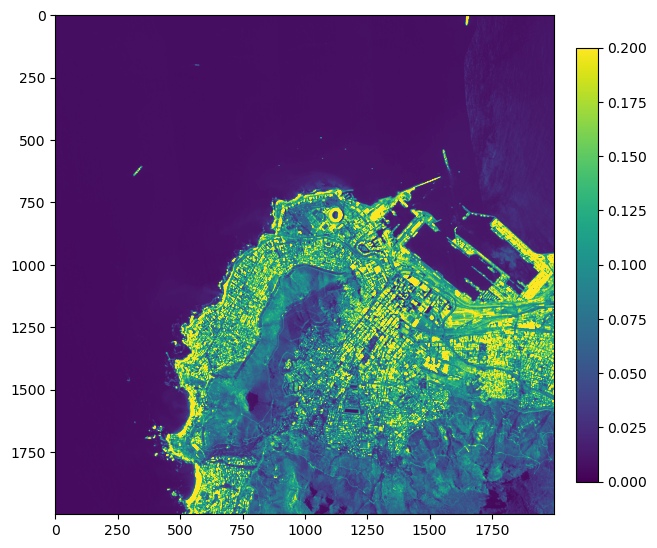

In [113]:
# Read one spectral band array and plot it
#### uncomment one of the GetRaseterBand lines to run
img_red = rfl_bio_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
#img_green = rfl_bio_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = rfl_bio_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(img_red, vmin=0, vmax=.20)
#plt.imshow(img_green, vmin=0, vmax=0.20)
#plt.imshow(img_blue, vmin=0, vmax=0.20)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

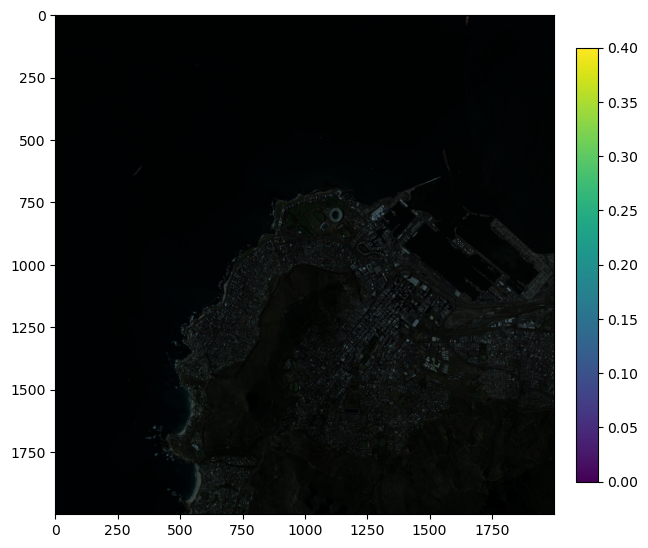

In [115]:
# Create a Red, Green, Blue Composite and Visualize
# get r,g,b arrays
red, green, blue = rfl_bio_open.GetRasterBand(57).ReadAsArray(), rfl_bio_open.GetRasterBand(38).ReadAsArray(), rfl_bio_open.GetRasterBand(22).ReadAsArray()

# set fill values (-9999.) to 0 for each array
red[red == -9999.], green[green == -9999.], blue[blue == -9999.] = 0, 0, 0

# function scales reflectance values to 8 bits
scale8bit = lambda a: ((a - a.min()) * (1/(a.max() - a.min()) * 255)).astype('uint8')

# get 8bit arrays for each band
red8, green8, blue8 = scale8bit(red), scale8bit(green), scale8bit(blue)

# set rescaled fill pixels back to 0 for each array
red8[red == 0], green8[green == 0], blue8[blue == 0] = 0, 0, 0

rgb_stack = np.zeros((nrows,ncols,3),'uint8')
rgb_stack[...,0], rgb_stack[...,1], rgb_stack[...,2] = red8, green8, blue8

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [117]:
# Apply a Histogram Stretch to for an Improved Visualization

rgb_stack.shape

(2000, 2000, 3)

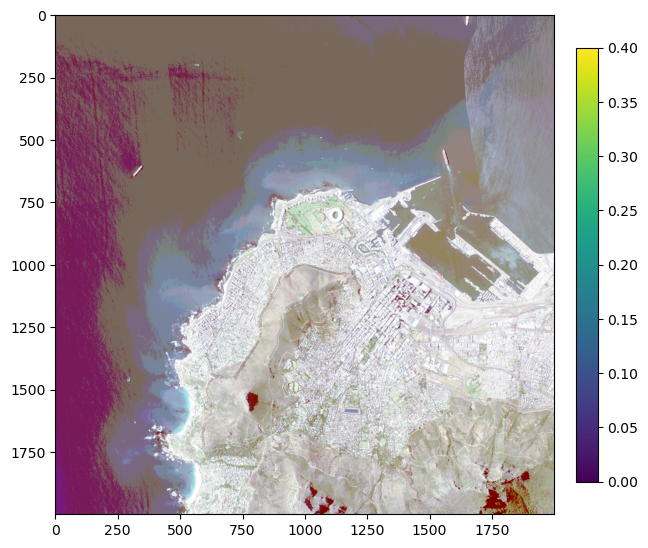

In [119]:
# apply histogram equalization to each band
for i in range(rgb_stack.shape[2]):

    # band i
    b = rgb_stack[:,:,i]
    
    # histogram from flattened (1d) image
    b_histogram, bins = np.histogram(b.flatten(), 256)

    # cumulative distribution function
    b_cumdistfunc = b_histogram.cumsum()

    # normalize
    b_cumdistfunc = 255 * b_cumdistfunc / b_cumdistfunc[-1]

    # get new values by linear interpolation of cdf
    b_equalized = np.interp(b.flatten(), bins[:-1], b_cumdistfunc)
    
    # reshape to 2d and add back to rgb_stack
    rgb_stack[:,:,i] = b_equalized.reshape(b.shape)

plt.rcParams['figure.figsize'] = [7,17]
plt.rcParams['figure.dpi'] = 100
plt.imshow(rgb_stack, vmin=0, vmax=.40)
plt.colorbar(fraction=0.04, pad=0.04)
plt.show()

In [187]:
# Plot a Spectral Profile From a Point of Interest
import matplotlib.pyplot as plt
from spectral.io import envi
import numpy as np
from pyproj import Proj
import os
from osgeo import gdal

In [189]:
# let's define the coordinates and data file from which we'll extract spectra and the lat/lon coordinates
data_file = 'AVIS data/bioscape_v02_34_11_rfl'
coords = [-33.9485221, 18.39214325]
coords

[-33.9485221, 18.39214325]

In [191]:
data_file

'AVIS data/bioscape_v02_34_11_rfl'

In [ ]:
# Before we can extract pixel spectral information, we need to convert the lat/lon coordinate to an image coordinate (pixel, line) space

In [ ]:
# 1. Project point location lat/lon to UTM (zone 34S). The AVIRIS-NG Scene is in UTM zone 34S (EPSG:32734) as stated before

In [193]:
# step to translate coordinates
# EPSG:32734 - WGS-84 / UTM zone 34S

from pyproj import Proj
p = Proj("EPSG:32734", preserve_units=False)
x,y = p(18.39214325, -33.9485221)
print('x value in UTM meters:', x)
print('y value in UTM meters:', y)

x value in UTM meters: 258993.3449821365
y value in UTM meters: 6240487.526984125


In [195]:
coords_UTM = [6240487.526984125, 258993.3449821365]

# define aonther location for comparison
coords_UTM2 = [6239776.9, 27902.3]

In [197]:
gdal_ds = gdal.Open(data_file)
proj_native = gdal_ds.GetProjection()
proj_native

'PROJCS["unnamed",GEOGCS["Ellipse Based",DATUM["Ellipse Based",SPHEROID["Unnamed",6378137,298.257223562997]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-30],PARAMETER["longitude_of_center",25],PARAMETER["standard_parallel_1",-22],PARAMETER["standard_parallel_2",-38],PARAMETER["false_easting",1400000],PARAMETER["false_northing",1300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [199]:
#2. Get and print AVIRIS-NG Scene information that we need in order to transform the UTM point x,y values to an image row/col location

trans = gdal_ds.GetGeoTransform() # x_ul, x_px, x_rot, y_ul, y_rot, y_px
print('\nGetGeoTransform Return Values =', trans) 


GetGeoTransform Return Values = (789997.5, 5.0, -0.0, 850002.5, -0.0, -5.0)


In [203]:
# 3. x,y offset values are a position on the x,y grid of the pixel of interest

x_px_offset = int(round((coords_UTM[1] - trans[0]) / trans[1]))
y_px_offset = int(round((coords_UTM[0] - trans[3]) / trans[5]))

print(x_px_offset, y_px_offset)

-106201 -1078097


In [135]:
x_px_offset2 = int(round((coords_UTM2[1] - trans[0]) / trans[1]))
y_px_offset2 = int(round((coords_UTM2[0] - trans[3]) / trans[5]))

print(x_px_offset2, y_px_offset2)

-152419 -1077955


In [137]:
ds = envi.open(os.path.splitext(data_file)[0] + '.hdr')
ds

	Data Source:   '.\AVIS data/bioscape_v02_34_11_rfl'
	# Rows:           2000
	# Samples:        2000
	# Bands:           425
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32

In [207]:
offset_size = 1
data = ds.open_memmap(interleave='bip')[y_px_offset - 1: y_px_offset + 1, x_px_offset - 1: x_px_offset + 1, :]
data

array([], shape=(0, 0, 425), dtype=float32)

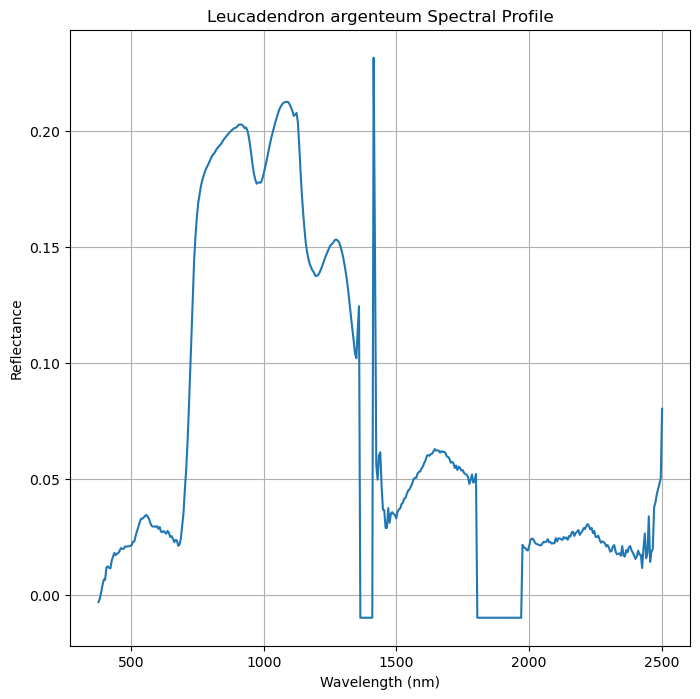

In [225]:
# 7. Extract and plot spectral profile
if 0 <= x_px < ds.shape[1] and 0 <= y_px < ds.shape[0]:
    spectrum = mm[y_px, x_px, :]
    wl = np.array([float(w) for w in ds.metadata['wavelength']])
    
    plt.plot(wl, spectrum)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.title("Leucadendron argenteum Spectral Profile")
    plt.grid(True)
    plt.show()
else:
    print("Pixel indices are out of bounds.")

In [139]:
offset_size = 1
data = ds.open_memmap(interleave='bip')[y_px_offset - 1: y_px_offset + 1, x_px_offset - 1: x_px_offset + 1, :]
data

array([], shape=(0, 0, 425), dtype=float32)

In [141]:
offset_size = 1
data2 = ds.open_memmap(interleave='bip')[y_px_offset2 - 1: y_px_offset2 + 1, x_px_offset2 - 1: x_px_offset2 + 1, :]
data2

array([], shape=(0, 0, 425), dtype=float32)

In [145]:
print(x_px_offset, y_px_offset)
print(ds.shape)  # (rows, cols, bands), should be (2000, 2000, 425)

-106201 -1078097
(2000, 2000, 425)


C:\Users\PC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\PC\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


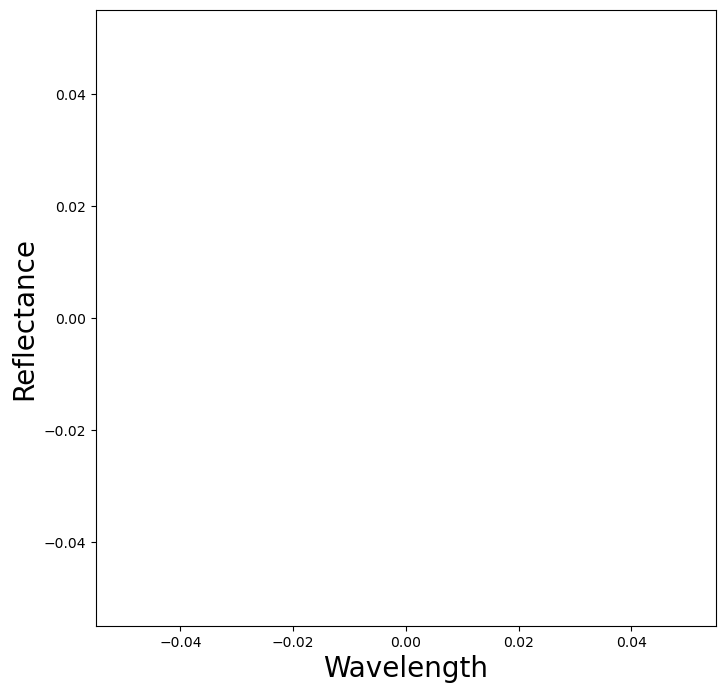

In [227]:
wl = np.array([float(x) for x in ds.metadata['wavelength']])
wl2 = np.array([float(x) for x in ds.metadata['wavelength']])

plt.plot(wl, np.mean(data, axis=(0, 1)))
plt.rcParams['figure.figsize'] = [8, 8]
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

# plot the average spectrum

In [229]:
# Define a list of wavelengths that are "bad" 

bblist = np.ones((425,))  # create a 1D array with values ones
# set tails and atmospheric window to zero
bblist[0:14] = 0        # tail
bblist[189:225] = 0     # atmospheric window
bblist[281:336] = 0     # atmospheric window
bblist[405:] = 0        # tail

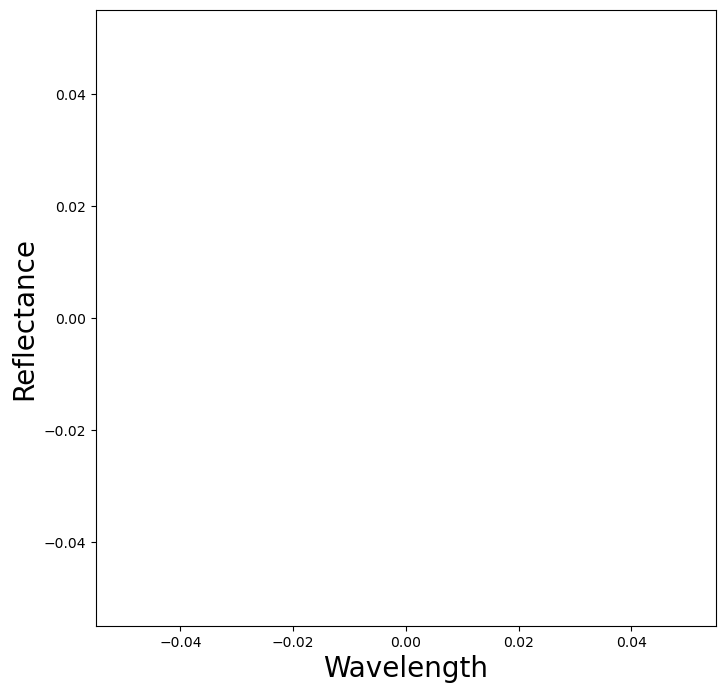

In [231]:
plt.rcParams['figure.figsize'] = [8, 8]

wl[bblist == 0] = np.nan 
wl2[bblist == 0] = np.nan
plt.plot(wl, np.mean(data, axis=(0, 1)), color = 'g')
plt.plot(wl2, np.mean(data2, axis=(0, 1)), color = 'r')
plt.xlabel('Wavelength', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()